In [1]:
import pandas as pd
import os

data_folder_path = './../../data'

In [2]:
df = pd.read_csv(os.path.join(data_folder_path, 'tips.csv'))
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


- total_bill — общая сумма, уплаченная за заказ;
- tip — размер чаевых;
- sex — пол клиента;
- smoker — является ли клиент курильщиком (в 90-е годы в ресторанах США были зоны для курящих);
- day — день недели;
- time — время (обед или ужин);
- size — количество посетителей, обедавших за столом.

## Задания:

#### Сколько строк содержится в датафрейме без учёта заголовка? Пример формата ответа: 150.

In [3]:
len(df.index)

244

#### Напишите максимальную сумму счёта в датафрейме. Ответ введите с точностью до двух цифр после запятой, например:100.55.

In [4]:
df['total_bill'].max()

50.81

# Метод plot

Для быстрого и корректного отображения графиков, которые мы будем строить, запустите  команду. Она позволит автоматически выводить на экран все графики и диаграммы без использования дополнительных функций.

In [5]:
%matplotlib inline

## Общий синтаксис метода plot

Основным методом, который предлагает Pandas для быстрого создания простейших графиков и диаграмм, является метод plot. Примените этот метод к нашему датафрейму и посмотрите на результат:

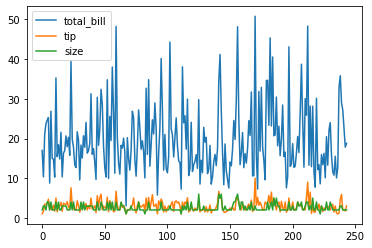

In [6]:
df.plot()

При обращении к методу plot без указания параметров компьютер построил графики для всех имеющихся в датафрейме количественных признаков. При этом на графике по оси х отложены порядковые номера данных в датафрейме (индексы), а по оси y — значения показателей.

#### Настройка параметров метода

Если применить метод plot не ко всему датафрейму, а только к одному столбцу, а в качестве одного из параметров указать тип диаграммы (например, тип hist), то мы получим гистограмму распределения признака:

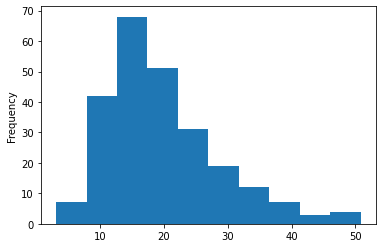

In [7]:
df['total_bill'].plot(kind='hist')

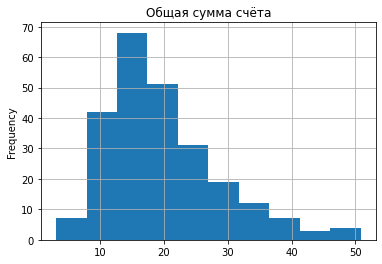

In [8]:
df['total_bill'].plot(kind='hist', grid=True, title='Общая сумма счёта')

Для работы с категориальными (нечисловыми) переменными с помощью метода plot датафрейм необходимо предварительно обработать. Если мы хотим увидеть распределение посетителей по дням недели, нужно посчитать, сколько заказов пришлось на каждый из дней. Сделать это можно с помощью метода value_counts(), а уже к получившемуся датафрейму применить метод plot. Тип графика, который мы будем использовать, — bar (столбчатая диаграмма). Чтобы все столбцы были одного цвета, введём параметр colormap со значением coolwarm:

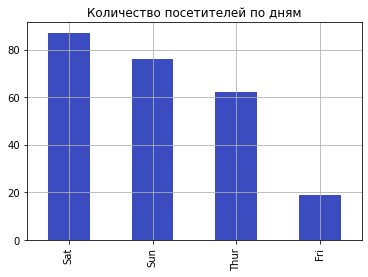

In [9]:
df['day'].value_counts().plot(
    kind='bar',
    grid=True,
    colormap='coolwarm',
    title='Количество посетителей по дням')

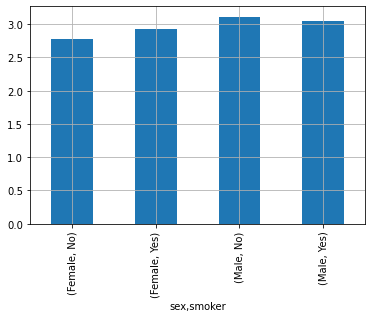

In [10]:
df.groupby(by=['sex', 'smoker'])['tip'].mean().plot(kind='bar', grid=True)

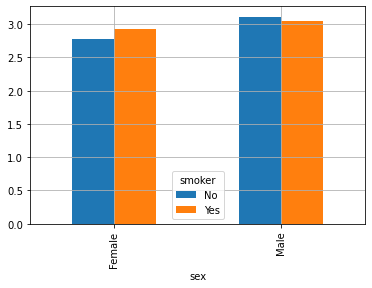

In [11]:
df.pivot_table(index='sex', columns='smoker', values='tip').plot(kind='bar', grid=True)

## Отображение двух показателей на графике

Метод plot позволяет использовать параметр subplots, который принимает логические значения True или False. При установке значения True можно разместить несколько графиков в одной рабочей области:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000212B03E3DF0>,
      dtype=object)

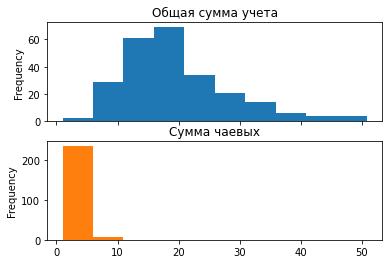

In [13]:
df[['total_bill', 'tip']].plot(
    kind='hist',
    subplots=True,
    title=['Общая сумма учета', 'Сумма чаевых'],
    legend=False)

Такой вариант отображения графиков показывает, в каких пределах изменяются оба признака, но ничего не говорит о том, есть ли какая-то связь между суммой по счёту и суммой чаевых. Для получения такой информации мы можем построить график типа **scatter plot**:

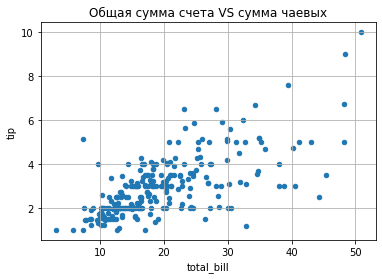

In [14]:
df.plot(
    x='total_bill',
    y='tip',
    kind='scatter',
    grid=True,
    title='Общая сумма счета VS сумма чаевых')

На этом графике можно увидеть, что более щедрые чаевые обычно оставляют посетители, которые делают более дорогие заказы, а также видны исключения из правила.

Если нам нужно совместить на графике несколько качественных и количественных показателей, то датафрейм следует предварительно обработать. Например, если мы хотим отобразить средние значения суммы счёта и размера чаевых по дням недели, то потребуется такой код:

In [18]:
df.pivot_table(values=['total_bill', 'tip'], index='day', aggfunc='mean')

,tip,total_bill
day,,
Fri,2.734737,17.151579
Sat,2.993103,20.441379
Sun,3.255132,21.410000
Thur,2.771452,17.682742


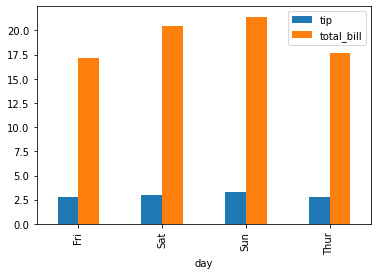

In [19]:
df.pivot_table(values=['total_bill', 'tip'], index='day', aggfunc='mean').plot(kind='bar')